**Importing Image Data Library And Configuration**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
path = '/content/drive/MyDrive/Naalaiya Thiran/Dataset.zip'

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
cd '/content/drive/MyDrive/Naalaiya Thiran'

/content/drive/MyDrive/Naalaiya Thiran


In [ ]:
!unzip Dataset.zip

unzip:  cannot find or open Dataset.zip, Dataset.zip.zip or Dataset.zip.ZIP.


In [7]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/Naalaiya Thiran/Dataset/training_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode='grayscale')

Found 15750 images belonging to 9 classes.


In [8]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode='grayscale')

Found 2250 images belonging to 9 classes.


In [9]:
print("Len x-train : ",len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  53
Len x-test :  8


In [10]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**IMAGE PREPROCESSING**

**Import ImageDataGenerator Library And Configure It**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

# **MODEL BUILDING**

Adding The Convolution Layer

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [17]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Naalaiya Thiran/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [18]:
# let img1 be an image with no features
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])
  
kernel_horizontal = np.array([np.array([2, 2]), np.array([-2, -2])])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')
  
kernel_vertical = np.array([np.array([2, -2]), np.array([2, -2])])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


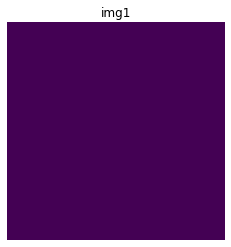

Horizontal edge confidence score: 0
Vertical edge confidence score: 0


In [19]:
# We will apply the kernels on the images by
# elementwise multiplication followed by summation
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))
  
# Visualizing img1
plt.imshow(img1)
plt.axis('off')
plt.title('img1')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(img1, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img1, 
                                            kernel_vertical))

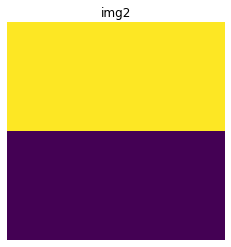

Horizontal edge confidence score: 800
Vertical edge confidence score: 0


In [20]:
# Visualizing img2
plt.imshow(img2)
plt.axis('off')
plt.title('img2')
plt.show()

# Checking for horizontal and vertical features in image2
print('Horizontal edge confidence score:', apply_kernel(img2, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img2, 
                                            kernel_vertical))

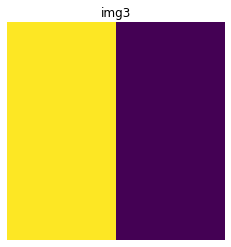

Horizontal edge confidence score: 0
Vertical edge confidence score: 800


In [21]:
# Visualizing img3
plt.imshow(img3)
plt.axis('off')
plt.title('img3')
plt.show()
  
# Checking for horizontal and vertical features in image3
print('Horizontal edge confidence score:', apply_kernel(img3, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img3, 
                                            kernel_vertical))

In [22]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [23]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**MODEL CREATION**

In [24]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [25]:
# Creating Model
model=Sequential()

In [26]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Flatten())

In [29]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [30]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
18/18 [==============================] - 97s 5s/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.2245 - val_accuracy: 0.9760
Epoch 2/10
18/18 [==============================] - 86s 5s/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.2355 - val_accuracy: 0.9760
Epoch 3/10
18/18 [==============================] - 85s 5s/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.2541 - val_accuracy: 0.9756
Epoch 4/10
18/18 [==============================] - 88s 5s/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.2707 - val_accuracy: 0.9760
Epoch 5/10
18/18 [==============================] - 86s 5s/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.2608 - val_accuracy: 0.9760
Epoch 6/10
18/18 [==============================] - 85s 5s/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.2538 - val_accuracy: 0.9760
Epoch 7/10
18/18 [==============================] - 84s 5s/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.2577 - val_accuracy: 0.9760
Epoch 8/10
18/18 [==

**Import The Packages And Load The Saved Model**

In [34]:
model.save('realtimecomm.h5')

In [35]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [36]:
#load the model
model=load_model('realtimecomm.h5')

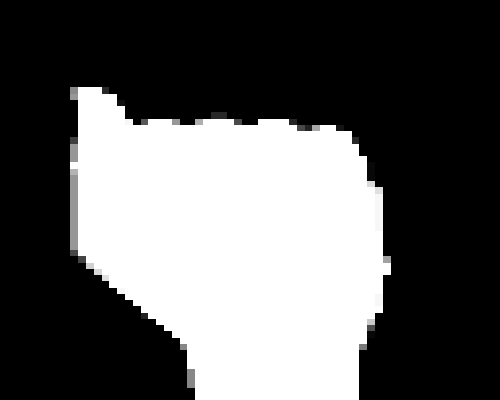

In [37]:
img=image.load_img('/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set/A/10.png',target_size=(400,500))
img


In [46]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,3))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [47]:
img=image.load_img("/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set/A/10.png")
detect(img)

1/1 [==============================] - 0s 100ms/step
THE PREDICTED LETTER IS  A


In [49]:
img = image.load_img('/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set/B/109.png')
pred=detect(img)

1/1 [==============================] - 0s 34ms/step
THE PREDICTED LETTER IS  B


In [50]:
img = image.load_img('/content/drive/MyDrive/Naalaiya Thiran/Dataset/test_set/D/110.png')
pred=detect(img)

1/1 [==============================] - 0s 30ms/step
THE PREDICTED LETTER IS  D
